<a href="https://colab.research.google.com/github/gulliyevn/DeepLearningModels/blob/main/TrainingDeepNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vanisihing/Exploding Gradients Problem

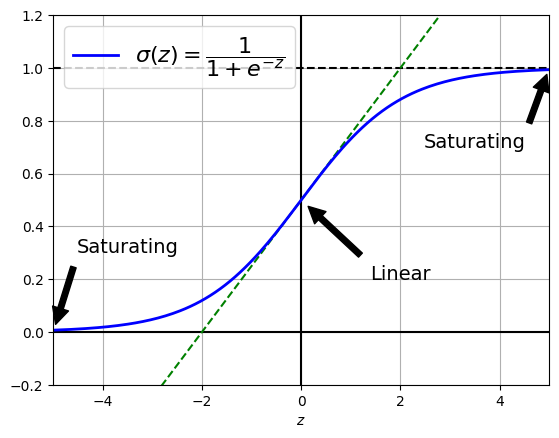

In [128]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1/(1+np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2,
         label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props,
             fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)


plt.show()

# Xavier and He Intialization

In [129]:
import tensorflow as tf
dense=tf.keras.layers.Dense(50,activation="relu",
                            kernel_initializer='he_normal')

In [130]:
he_avg_init=tf.keras.initializers.VarianceScaling(scale=2.,mode='fan_avg',distribution='uniform')

dense=tf.keras.layers.Dense(50,activation="sigmoid",kernel_initializer=he_avg_init)

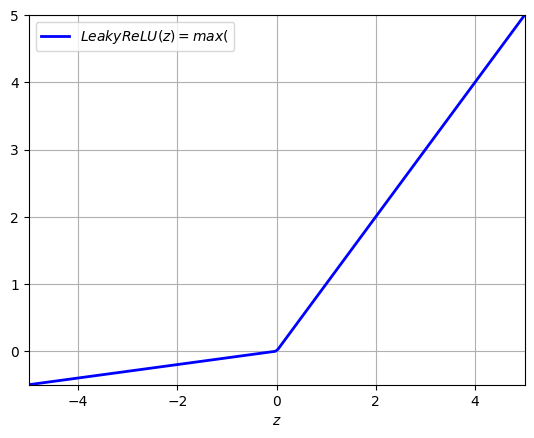

In [131]:
def leaky_relu(z,alpha):
  return np.maximum(alpha*z,z)

z=np.linspace(-5,5,200)
plt.plot(z,leaky_relu(z,0.1),"b-",linewidth=2,label="$LeakyReLU(z)=max(\alpha z,z)$")
plt.grid(True)
plt.xlabel("$z$")
plt.axis([-5,5,-0.5,5])
plt.legend()
plt.show()

In [132]:
leaky_relu=tf.keras.layers.LeakyReLU(alpha=0.2)
dense=tf.keras.layers.Dense(50,activation=leaky_relu,
                            kernel_initializer='he_normal')

In [133]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(50,kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(alpha=0.2)
])

In [134]:
dense=tf.keras.layers.Dense(50,activation="selu",kernel_initializer="lecun_normal")

In [135]:
tf.random.set_seed(42)
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [136]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),metrics=["accuracy"])

In [137]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]
X_train,X_valid,X_test=X_train/255,X_valid/255,X_test/255

In [138]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [139]:
pixel_means=X_train.mean(axis=0,keepdims=True)
pixel_stds=X_train.std(axis=0,keepdims=True)
X_train_scaled=(X_train-pixel_means)/pixel_stds
X_valid_scaled=(X_valid-pixel_means)/pixel_stds
X_test_scaled=(X_test-pixel_means)/pixel_stds

In [140]:
history=model.fit(X_train_scaled,y_train,epochs=5,validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 [==============================] - 61s 27ms/step - loss: 1.2295 - accuracy: 0.5323 - val_loss: 0.8643 - val_accuracy: 0.6752
Epoch 2/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.7849 - accuracy: 0.7157 - val_loss: 0.7234 - val_accuracy: 0.7356
Epoch 3/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.7886 - accuracy: 0.7146 - val_loss: 0.8137 - val_accuracy: 0.6840
Epoch 4/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.6986 - accuracy: 0.7414 - val_loss: 0.6047 - val_accuracy: 0.7826
Epoch 5/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.6513 - accuracy: 0.7640 - val_loss: 0.8474 - val_accuracy: 0.7220


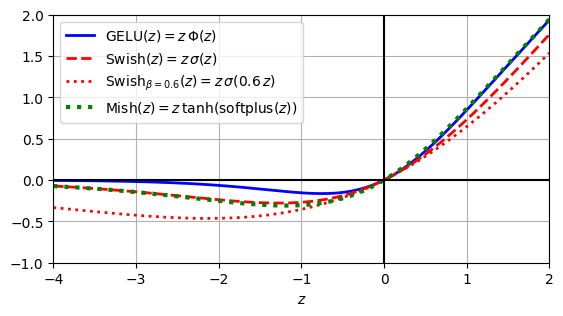

In [141]:
def swish (z,beta=1):
  return (z*sigmoid(beta*z))

def approx_gelu(z):
  return swish (z,beta=1.702)

def softplus(z):
  return np.log(1+np.exp(z))

def mish(z):
  return z*np.tanh(softplus(z))

z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

plt.show()

# Batch Normalization

In [142]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [143]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation="softmax")])

In [144]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [145]:
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [193]:
model.fit(X_train,y_train,epochs=2,
          validation_data=(X_valid,y_valid),verbose=0)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100,kernel_initializer="he_normal",use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10,activation="softmax")])

In [194]:
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [195]:
model.fit(X_train,y_train,epochs=2,
          validation_data=(X_valid,y_valid),verbose=0)

In [ ]:
model.evaluate(X_test,y_test)

# Gradient Clipping

In [ ]:
optimizer=tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [ ]:
optimizer=tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [ ]:
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

In [ ]:
model_A=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8,activation="softmax")
])

In [ ]:
model_A.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.SGD(learning_rate=(1e-3)),metrics="accuracy")

In [ ]:
model_A.fit(X_train_A,y_train_A,epochs=20,validation_data=(X_valid_A,y_valid_A),verbose=0)

In [ ]:
model_A.evaluate(X_test_A,y_test_A)

In [196]:
model_A.save("my_model_A")

In [ ]:
model_B=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1,activation="softmax")
])

In [ ]:
model_B.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=(1e-3)),
                metrics="accuracy")

In [ ]:
model_A.fit(X_train_B,y_train_B,epochs=20,validation_data=(X_valid_B,y_valid_B),verbose=0)

In [ ]:
model_A.evaluate(X_test_B,y_test_B)

In [ ]:
model_B.save("my_model_A")

In [ ]:
model_A=tf.keras.models.load_model("my_model_A")
model_B_on_A=tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [ ]:
tf.random.set_seed(42)

In [197]:
model_A_clone=tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [198]:
model_B_on_A=tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [199]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable=False
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [200]:
model_B_on_A.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 1)                 101       
                                                                 
Total params: 98801 (385.94 KB)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 98700 (385.55 KB)
_________________________________________________________________


In [201]:
history=model_B_on_A.fit(X_train_B,y_train_B,epochs=4,
                         validation_data=(X_valid_B,y_valid_B),verbose=0)

for layer in model_B_on_A.layers[:-1]:
  layer.trainable=True

optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

history=model_B_on_A.fit(X_train_B,y_train_B,epochs=16,
                         validation_data=(X_valid_B,y_valid_B))

Epoch 1/16
7/7 [==============================] - 1s 60ms/step - loss: 0.8072 - accuracy: 0.5500 - val_loss: 0.7860 - val_accuracy: 0.5124
Epoch 2/16
7/7 [==============================] - 0s 16ms/step - loss: 0.7444 - accuracy: 0.5450 - val_loss: 0.7369 - val_accuracy: 0.5223
Epoch 3/16
7/7 [==============================] - 0s 17ms/step - loss: 0.7061 - accuracy: 0.5550 - val_loss: 0.7099 - val_accuracy: 0.5331
Epoch 4/16
7/7 [==============================] - 0s 31ms/step - loss: 0.6807 - accuracy: 0.5600 - val_loss: 0.6862 - val_accuracy: 0.5490
Epoch 5/16
7/7 [==============================] - 0s 19ms/step - loss: 0.6604 - accuracy: 0.5750 - val_loss: 0.6656 - val_accuracy: 0.5727
Epoch 6/16
7/7 [==============================] - 0s 20ms/step - loss: 0.6417 - accuracy: 0.6050 - val_loss: 0.6471 - val_accuracy: 0.6311
Epoch 7/16
7/7 [==============================] - 0s 17ms/step - loss: 0.6243 - accuracy: 0.6800 - val_loss: 0.6305 - val_accuracy: 0.6845
Epoch 8/16
7/7 [===========

In [202]:
def build_model(seed=42):
  tf.random.set_seed(seed)
  return tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28,28]),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10,activation='softmax')])

def build_and_train_model(optimizer):
  model=build_model()
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])
  return model.fit(X_train,y_train,epochs=10,
                   validation_data=(X_valid,y_valid),verbose=0)

# Optimizers

In [203]:
# optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3,momentum=0.9)
# history_sgd=build_and_train_model(optimizer)
# model.evaluate(X_test,y_test)

In [204]:
# optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3,momentum=0.9,nesterov=True)
# history_nestrov=build_and_train_model(optimizer)
# model.evaluate(X_test,y_test)

In [205]:
# optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3,rho=0.9)
# history_rmsprop=build_and_train_model(optimizer)
# model.evaluate(X_test,y_test)

In [206]:
# optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-3)
# history_adagrad=build_and_train_model(optimizer)
# model.evaluate(X_test,y_test)

In [207]:
# optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3,beta_1=0.9,beta_2=0.999)
# history_adam=build_and_train_model(optimizer)
# model.evaluate(X_test,y_test)

# Learning rate Scheduling

In [208]:
lr_schedult=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01,decay_steps=20_000,decay_rate=0.1,staircase=False)
optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedult)

In [209]:
history_exponential_scheduling=build_and_train_model(optimizer)

In [ ]:
model.evaluate(X_test,y_test)

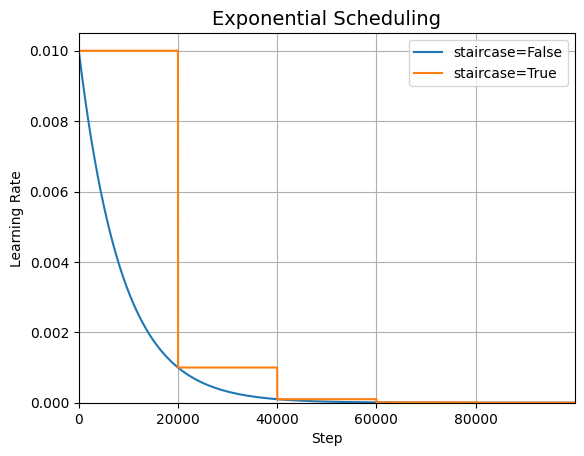

In [210]:
initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Piecewise Constant Scheduling

In [211]:
lr_schedule=tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=[50_000,80_000],values=[0.01,0.005,0.001])
optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)
history_piecewise_constant_scheduling=build_and_train_model(optimizer)

In [212]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3420 - accuracy: 0.8755


[0.34195247292518616, 0.8755000233650208]

In [ ]:
boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

# Avoiding Overfitting Through Regularization

In [213]:
layer=tf.keras.layers.Dense(100,activation="relu",
                            kernel_initializer="he_normal",
                            kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [214]:
tf.random.set_seed(42)

In [215]:
from functools import partial

RegualizedDense=partial(tf.keras.layers.Dense,
                        activation='relu',
                        kernel_initializer="he_normal",
                        kernel_regularizer=tf.keras.regularizers.l2(0.01))

model=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=[28,28]),
     RegualizedDense(100),
     RegualizedDense(100),
     RegualizedDense(10,activation="softmax")
])

In [ ]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

model.fit(X_train,y_train,epochs=2,
          validation_data=(X_valid,y_valid))

# Dropout

In [216]:
tf.random.set_seed(42)

In [217]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10,activation='softmax')
    ])

In [218]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10,
          validation_data=(X_valid,y_valid),verbose=0)
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3711 - accuracy: 0.8672


[0.3711113929748535, 0.8672000169754028]

# MC Dropout

In [219]:
tf.random.set_seed(42)

In [220]:
y_probas=np.stack([model(X_test,training=True) for sample in range(100)])
y_proba=y_probas.mean(axis=0)

In [221]:
model.predict(X_test[:1]).round(3)

1/1 [==============================] - 0s 87ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.017, 0.   , 0.204, 0.   ,
        0.779]], dtype=float32)

In [ ]:
y_proba[0].round(3)

In [222]:
y_std=y_probas.std(axis=0)
y_std[0].round(3)

array([0.   , 0.001, 0.   , 0.001, 0.001, 0.09 , 0.   , 0.16 , 0.004,
       0.183], dtype=float32)

# Max Norm

In [223]:
dense= tf.keras.layers.Dense(
    100,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.)
)

MaxNormDense=partial(tf.keras.layers.Dense,
                     activation='relu',
                     kernel_initializer='he_normal',
                     kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    MaxNormDense(100),
    MaxNormDense(100),
    MaxNormDense(10,activation='softmax')
])

optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10,
          validation_data=(X_valid,y_valid),verbose=0)

In [224]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8435


[0.43004095554351807, 0.843500018119812]